# Question 4
## Chapter 4, Ex. 4.3 (20 points)
## 4.3 In this exercise, we explore the use of local search methods to solve TSPs of the type defined in Exercise 3.30. 

## a) Implement and test a hill-climbing method to solve TSPs 
TSP = (Traveling Salesman Problem)

The traveling salesperson problem (TSP) is a touring problem in which each city must be visited exactly once. The aim is to find the shortest tour. The problem is known to be NP-hard, but an enormous amount of effort has been expended to improve the capabilities of TSP algorithms. In addition to planning trips for traveling salespersons, these algorithms have been used for tasks such as planning movements of automatic circuit-board drills and of stocking machines on shop floors.


### Build a Map of specified number of cities (number_of_cities)

City Coordinates: [(3, 0), (0, 5), (3, 1), (4, 0), (2, 5), (1, 2), (3, 2), (3, 5), (0, 0), (4, 1)]
Initial path length between 10 cities: 37.16087900735733


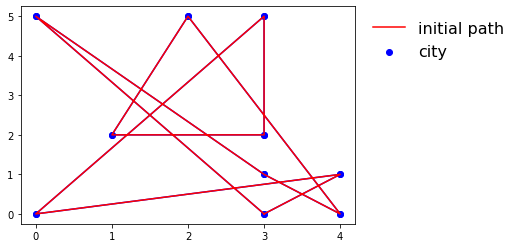

In [1]:
# Generate A Traveling Salesman Problem (Build a Map)

import random
import math
import matplotlib
import matplotlib.pyplot as plt
class TwoDimStateSpaceProblem:
    '''contains a list of coordinates representing a 2 dimmensional state space (city map)'''
    def __init__(self):
        self.ls = []
    
    def insert(self, value):
        self.ls.append(value)
    
    def get_path(self):
        '''returns list of x and y coordinates in order they are in the list for plotting'''
        x_coords = []
        y_coords = []
        for i in range(0,len(self.ls)):
            x_coords.append(self.ls[i][0])
            y_coords.append(self.ls[i][1])
        # add point to connect head and tail
        x_coords.append(self.ls[0][0])
        y_coords.append(self.ls[0][1])
        return x_coords,y_coords
    
    def dist(self, p1, p2):
        '''helper function computes the distance between two coordinate points'''
        return math.hypot(p2[0] - p1[0], p2[1] - p1[1])

    def compute_path_length(self):
        x_coords,y_coords = self.get_path()
        d = 0
        for i in range(0,len(x_coords)-1):
            d+=self.dist([x_coords[i],y_coords[i]],[x_coords[i+1],y_coords[i+1]])
        # start coordinate repeated at the end so no need to account for it again 
        return d

    def swap_paths(self,ps1,ps2):
        '''takes two edges (represented by two positions in the list p1 and p2) and reconnects them to produce a new route'''
        p1 = min(ps1,ps2)
        p2 = max(ps1,ps2)
        # if the edges share a node, do nothing 
        if((p1==p2) or (p1+1==p2) or (p2+1==p1)):
            return
        else:
            temp_ls = self.ls
            # Swap  
            temp_ls[p1], temp_ls[p2-1] = temp_ls[p2-1], temp_ls[p1] 
            self.ls = temp_ls
            return
        
    def get_random_points(self):
        '''Gets indicies of two pairs of neighboring cities in the list ls''' 
        edges = []
        for i in range(0,2): # loop through twice to select two points at random
            pt1 = random.randint(0,len(self.ls))
            edges.append(pt1)
        self.edges=edges
        return(edges)
    
        
        
    
def make_map(n,x_lim,y_lim): 
    '''Generate a random 2D map with width limited to x_lim and height limited to y_lim
        of n points representing cities to be visited
        no points can repeat
    '''
    city_coords_x = []
    city_coords_y = []
    city_coords = [] # just to check for duplicates
    i=0
    while i<n:
        x = random.randint(0,x_lim)
        y = random.randint(0,y_lim)
        # check that x,y pair does not already exist
        if (x,y) not in city_coords:
            city_coords_x.append(x)
            city_coords_y.append(y)
            city_coords.append((x,y))
            i+=1
    return city_coords_x,city_coords_y



class Problem:
    
    def __init__(self,state,state_2):
        self.initial_state = state
        self.test_state = state_2
    
    def set_test_state(self,state):
        self.test_state = state
        
    def get_initial_state(self):
        return self.initial_state
    
    def get_test_state(self):
        return self.test_state


number_of_cities = 10
# city_coords_x,city_coords_y = make_map(number_of_cities,5,5)# num_cities, x_lim, y_lim
city_coords_x = [3, 0, 3, 4, 2, 1, 3, 3, 0, 4]
city_coords_y = [0, 5, 1, 0, 5, 2, 2, 5, 0, 1]

# Generate a state space consisting of Nodes to represent each city
#   the initial route between cities will be determined based on their position in the list of city coordinates (city_coords_x,city_coords_y) 
city_space = TwoDimStateSpaceProblem()
test_space = TwoDimStateSpaceProblem()
i = 0
# construct the nodes and store in the space
for i in range(0,len(city_coords_x)):
    city_space.insert((city_coords_x[i],city_coords_y[i]))
    test_space.insert((city_coords_x[i],city_coords_y[i]))

print("City Coordinates:",city_space.ls)

# Plot the initial route (lines connecting points)
x_vals,y_vals = city_space.get_path()
plt.scatter(city_coords_x,city_coords_y,color="blue")
plt.plot(x_vals, y_vals,color="blue")

# compute path initial path length
print("Initial path length between",len(city_space.ls),"cities:",city_space.compute_path_length())


prob = Problem(city_space,test_space)        

# Plot the initial route (lines connecting points)
x_vals,y_vals = city_space.get_path()
old_len = city_space.compute_path_length()
# plot the map
font = {'size' : 16}
matplotlib.rc('font', **font)

plt.scatter(city_coords_x,city_coords_y,color="blue",label="city")
plt.plot(x_vals, y_vals,color="red",label='initial path')

# add legend outside plot
lgd = plt.legend(bbox_to_anchor=(1.01, 1), loc='upper left',frameon=False)
plt.gcf().canvas.draw()
invFigure = plt.gcf().transFigure.inverted()
lgd_pos = lgd.get_window_extent()
lgd_coord = invFigure.transform(lgd_pos)
lgd_xmax = lgd_coord[1, 0]

plt.show()




### Solve TSP with HillClimbing Algorithm

New path length: 35.296317404858556


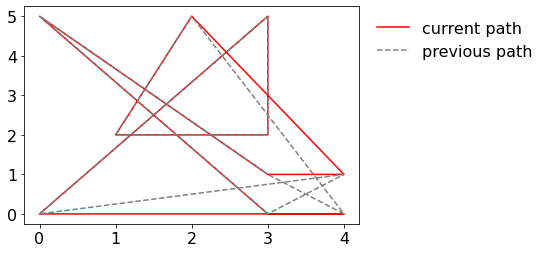

New path length: 33.663777647934225


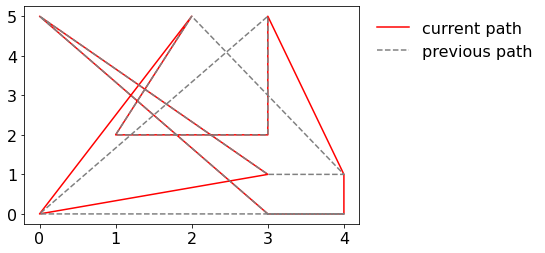

New path length: 27.44766094595442


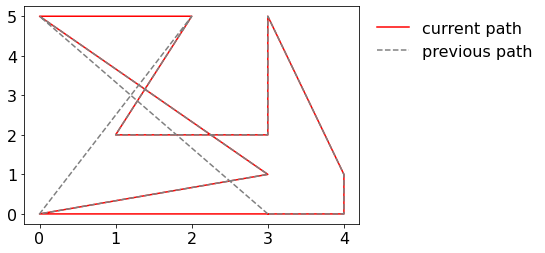

New path length: 27.352403158131132


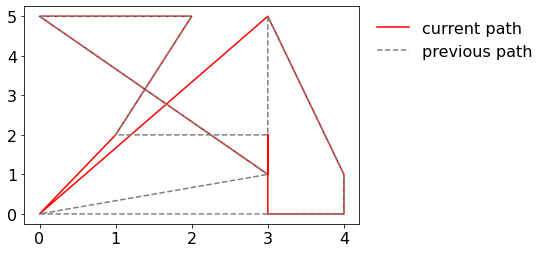

New path length: 25.52145126328583


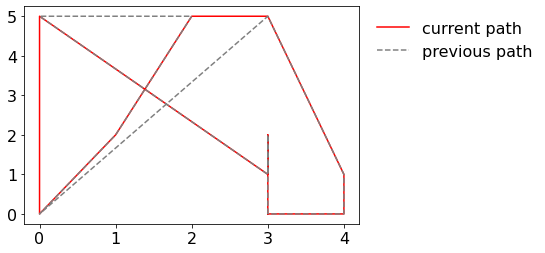

New path length: 23.764091950405117


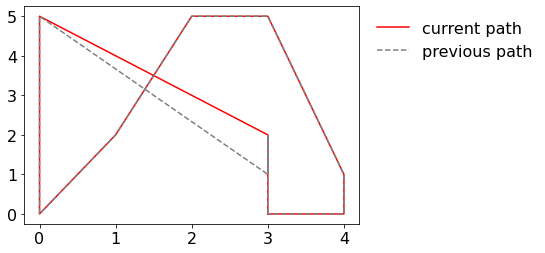

New path length: 20.35917360311745


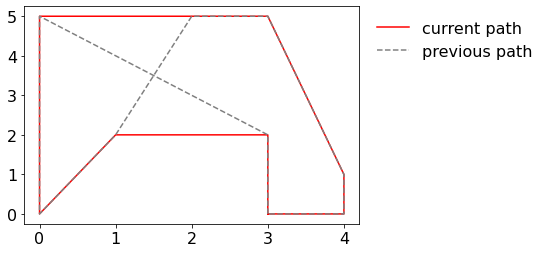

New path length: 20.12700253874982


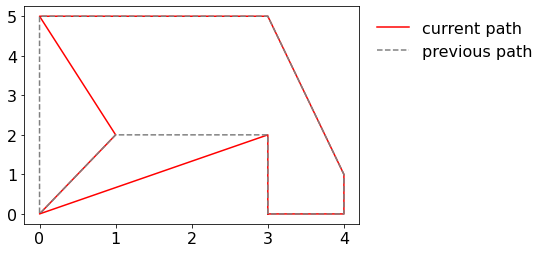

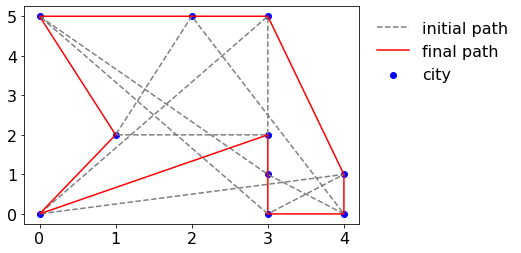


Path length before hillClimb: 37.16087900735733
Path length after hillClimb: 20.12700253874982
After 674 iterations


In [2]:
# Solve TSPs with HillClimbing

def hillClimbing(problem,max_iter,imp_iter):
    '''Finds a better route using Local Search
        Apply a single change to a known solution
        Swap two edges at random, If swapping results in an improvement (decrease in total distance travelled), keep the new route, else revert to the previous route
        Stopping criteria, iterations > max_iter or completes imp_iter iterations without improvement
    '''
    curr = problem.get_initial_state()
    i = 0
    j = 0
    while (i<max_iter) and (j<imp_iter):
        
        # pick random two edges in map 
        pts = curr.get_random_points()
        p1 = pts[0]
        p2 = pts[1]
        
        # test next state
        neigh = problem.get_test_state()
        # swap paths
        neigh.swap_paths(p1,p2)
        
        # Plot the new route (lines connecting points)
        x_vals_new,y_vals_new = neigh.get_path()
        plt.plot(x_vals_new, y_vals_new,color="red", label = "current path")
        # overlay with old path (and points with cities) to compare:
        x_vals_old,y_vals_old = curr.get_path()
        plt.plot(x_vals_old, y_vals_old,color="grey",linestyle='dashed',label = "previous path")
        
        
        if neigh.compute_path_length() < curr.compute_path_length():
            # improvement
            # Swap Paths
            curr.swap_paths(p1,p2)#.get_state() 
            print("New path length:",curr.compute_path_length())
            
            # add legend outside plot
            lgd = plt.legend(bbox_to_anchor=(1.01, 1), loc='upper left',frameon=False)
            plt.gcf().canvas.draw()
            invFigure = plt.gcf().transFigure.inverted()
            lgd_pos = lgd.get_window_extent()
            lgd_coord = invFigure.transform(lgd_pos)
            lgd_xmax = lgd_coord[1, 0]
            
            plt.show()
        else:
            # no improvement
            # Don't swap paths
            plt.close()
            neigh.swap_paths(p1,p2)# reset neigh
            j+=1
        i+=1
    
    return curr,i


max_iter = 200*number_of_cities
imp_iter = int(max_iter/3) # number of iterations to perform without improvement until stopping
c,iter_req = hillClimbing(prob,max_iter,imp_iter)
x_final,y_final = c.get_path()

plt.scatter(city_coords_x,city_coords_y,color="blue", label = "city")
plt.plot(x_vals,y_vals, color="grey",linestyle='dashed', label = "initial path")
plt.plot(x_final,y_final, color="red",label = "final path")

# add legend outside plot
lgd = plt.legend(bbox_to_anchor=(1.01, 1), loc='upper left',frameon=False)
plt.gcf().canvas.draw()
invFigure = plt.gcf().transFigure.inverted()
lgd_pos = lgd.get_window_extent()
lgd_coord = invFigure.transform(lgd_pos)
lgd_xmax = lgd_coord[1, 0]
plt.show()
print()
print("Path length before hillClimb:",old_len)
print("Path length after hillClimb:",c.compute_path_length())
print("After",iter_req,"iterations")


## b) Repeat part (a) using a genetic algorithm instead of hill climbing. You may want to consult Larranaga et al. (1999) for some suggestions for representations. 



### Use same map as above (must run cells above!)

Initial path length between 10 cities: 37.16087900735733


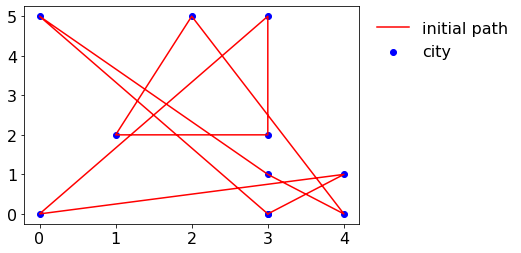

In [3]:
# Go back to the coordinates and regenerate state space
# Generate a state space consisting of Nodes to represent each city
#   the initial route between cities will be determined based on their position in the list of city coordinates (city_coords_x,city_coords_y) 
city_space = TwoDimStateSpaceProblem()
i = 0

# construct the nodes and store in the space
for i in range(0,len(city_coords_x)):
    city_space.insert((city_coords_x[i],city_coords_y[i]))

# Plot the initial route (lines connecting points)
x_vals,y_vals = city_space.get_path()
plt.scatter(x_vals,y_vals,color="blue", label = "city")
plt.plot(x_vals, y_vals,color="red", label = "initial path")


# add legend outside plot
lgd = plt.legend(bbox_to_anchor=(1.01, 1), loc='upper left',frameon=False)
plt.gcf().canvas.draw()
invFigure = plt.gcf().transFigure.inverted()
lgd_pos = lgd.get_window_extent()
lgd_coord = invFigure.transform(lgd_pos)
lgd_xmax = lgd_coord[1, 0]

# compute path initial path length
print("Initial path length between",len(city_space.ls),"cities:",city_space.compute_path_length())






### Solve TSP with Genetic Algorithm

Solving with Genetic Algorithm: 
Population size: 250 
Max iterations: 100 



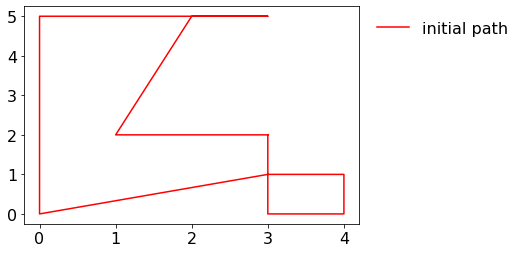

New shortest path length: 22.324555320336756


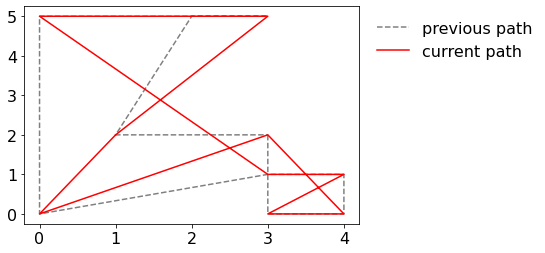

New shortest path length: 23.097452068300655


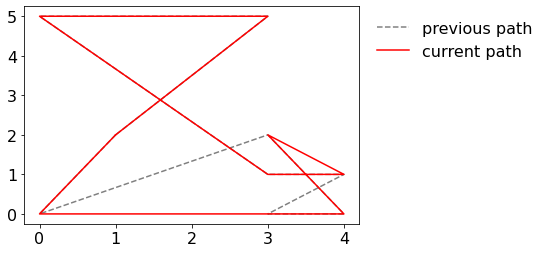

New shortest path length: 22.491900792836667


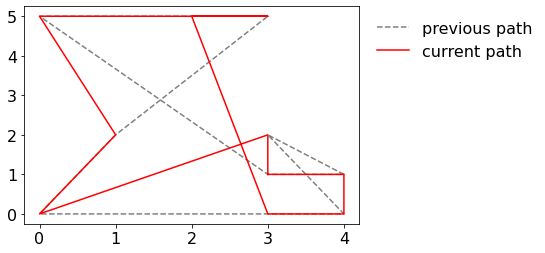

New shortest path length: 22.102916426724946


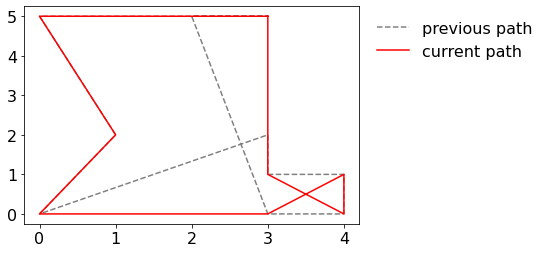

New shortest path length: 19.22677276241436


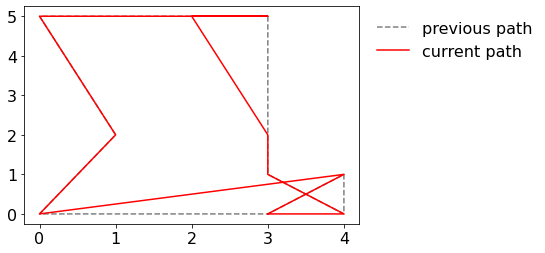

New shortest path length: 21.5121560482004


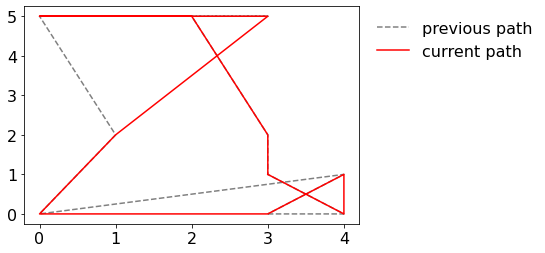

New shortest path length: 21.832324037878347


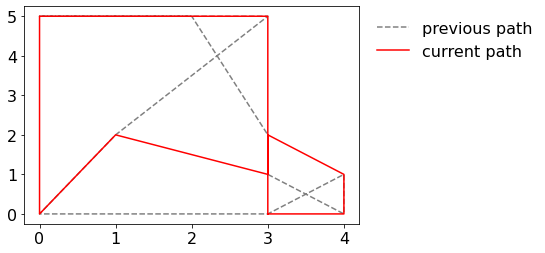

New shortest path length: 21.886349517372675


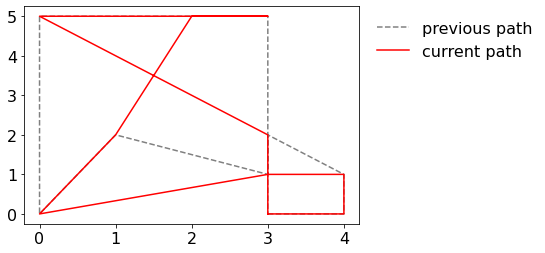

New shortest path length: 21.803263984955834


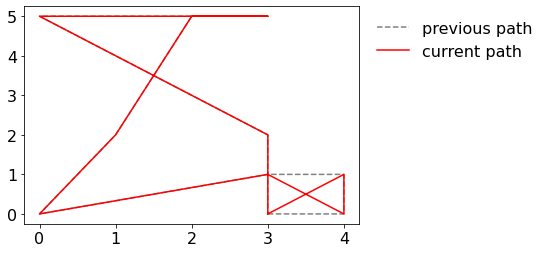

New shortest path length: 22.631691109702025


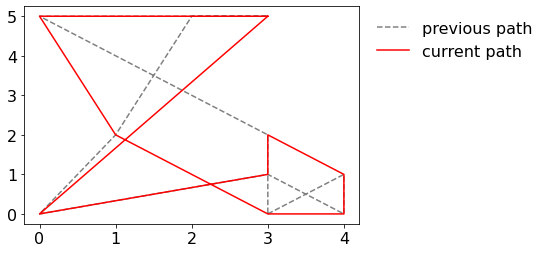

New shortest path length: 22.398147902301343


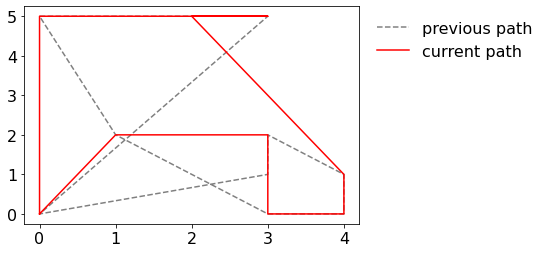

New shortest path length: 21.70820393249937


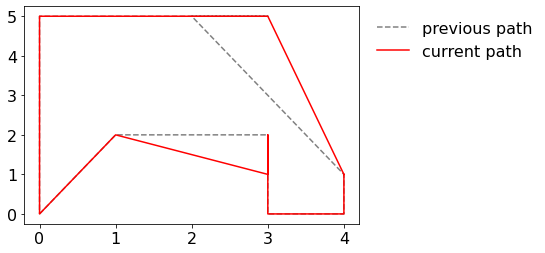

New shortest path length: 21.59524158061724


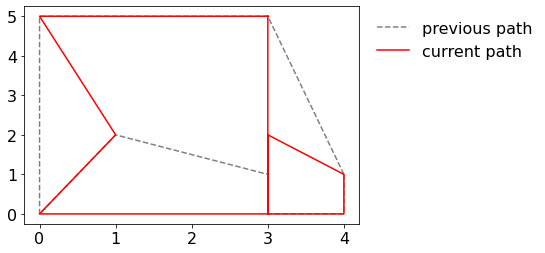

New shortest path length: 21.812559200041264


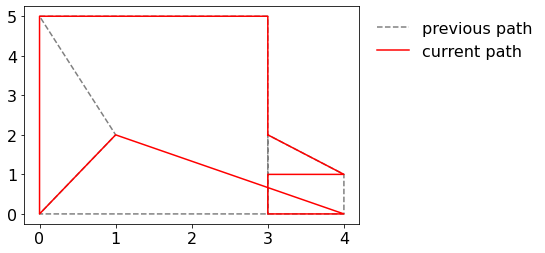

New shortest path length: 21.255832815336873


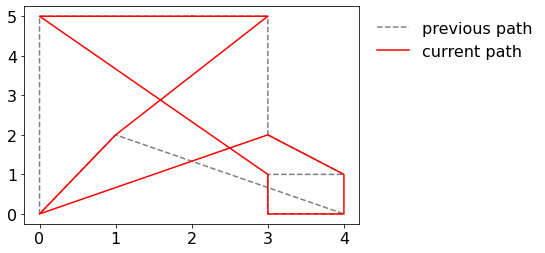

New shortest path length: 21.86138409080086


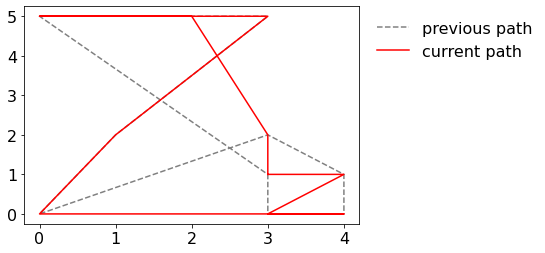

New shortest path length: 22.418110475505255


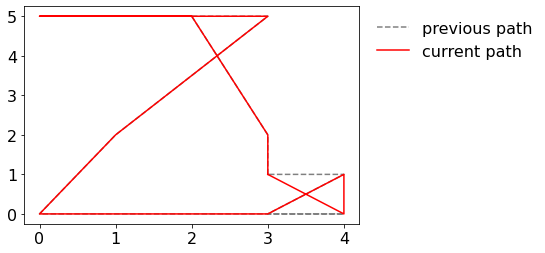

New shortest path length: 21.83232403787835


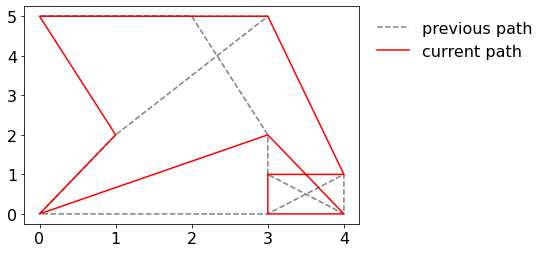

New shortest path length: 21.36307051624961


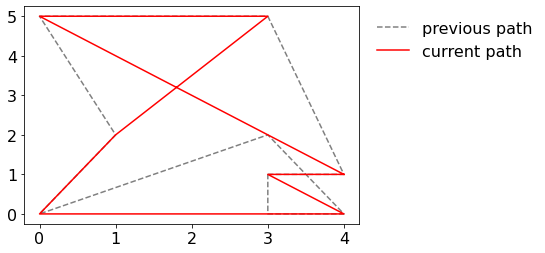

New shortest path length: 20.912687064829253


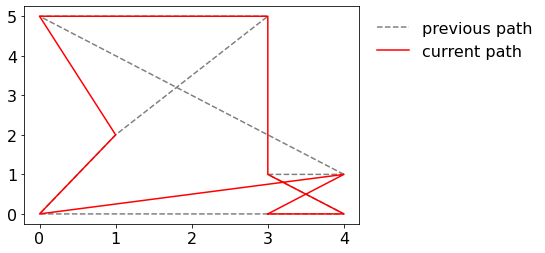

New shortest path length: 20.34987838803202


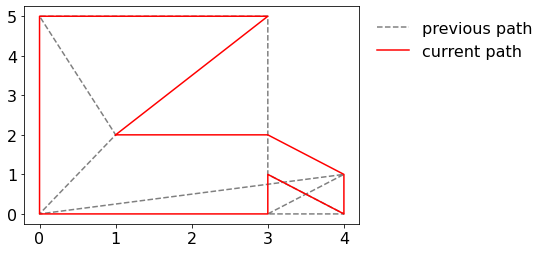

New shortest path length: 21.43397840021018


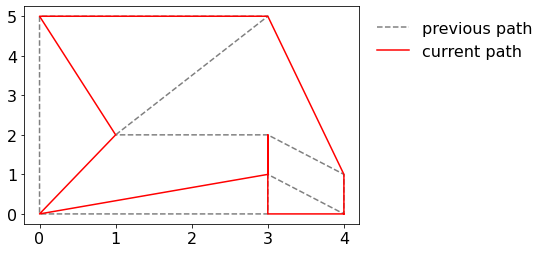

New shortest path length: 20.68372892345421


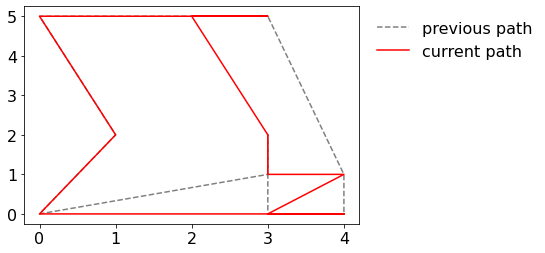

New shortest path length: 20.974836860209642


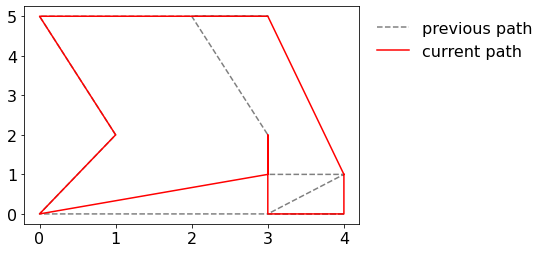

New shortest path length: 20.68372892345421


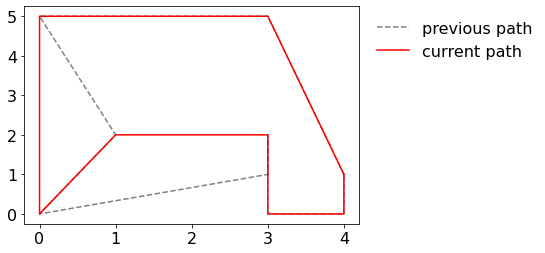

New shortest path length: 20.35917360311745


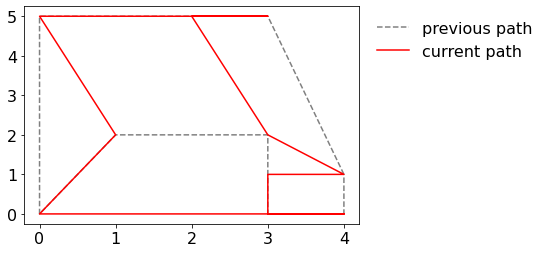

New shortest path length: 20.974836860209646


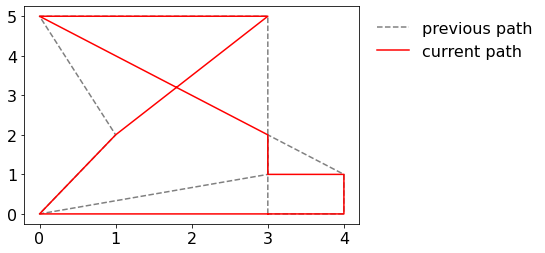

New shortest path length: 20.084259940083065


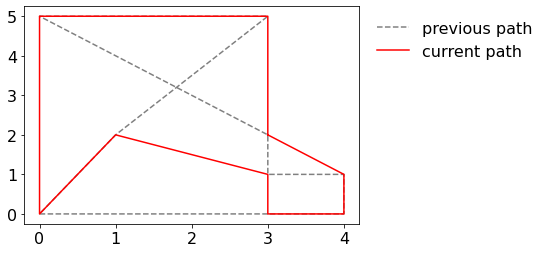

New shortest path length: 19.886349517372675


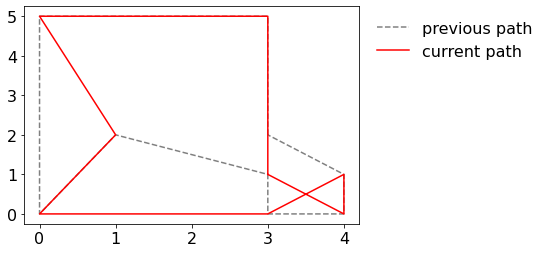

New shortest path length: 19.22677276241436


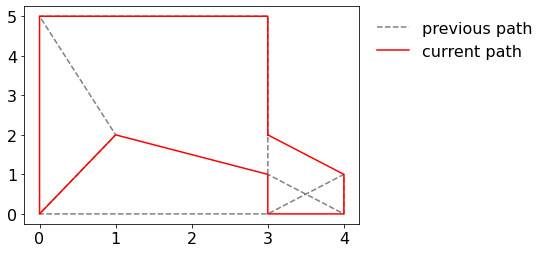

New shortest path length: 19.886349517372675


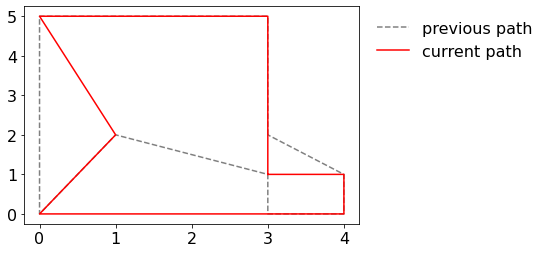

New shortest path length: 18.39834563766817


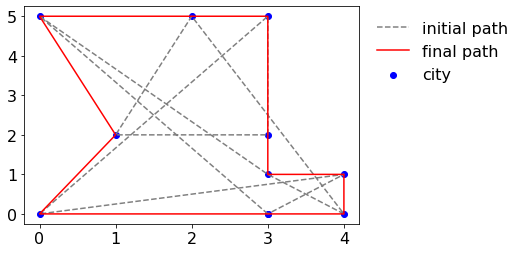

Initial path length: 37.16087900735733
Final path length: 18.39834563766817
After 72 iterations


In [4]:
# Solve using a Genetic Algorithm
import random
import numpy
import scipy.stats
import pandas as pd

def geneticAlgorithm(population, fitness_fn, max_iter, top_cut, imp_iter):
    '''Finds a better route using a Genetic Algorithm
        paths are represented as lists of (x,y) coordinates
        crossovers conducted using Partially-mapped crossover method (Goldberg and Lingle, 1985)
        The probability of mutation at each position = prob (0.01)
        
        Stopping criteria, iterations > max_iter or completes imp_iter iterations without improvement
    '''
    prev_shortest = None
    prev_shortest_length = -1
    j = 0
    q = 0
    print("Solving with Genetic Algorithm: \nPopulation size:",len(population),"\nMax iterations:",max_iter,"\n")
    while ((j<max_iter) and (q < imp_iter)): 
        # pick population and mating pairs based on fitness 
        fraction_size = 0.5 # reduce population size by 50% each time so it doesn't double with 2 children added each iteration
        population_m, population_f = pick_population(population, fitness_fn, top_cut, fraction_size) # top_cut are number of top paths that will always be included (probability of 1)
        # population_m and population_f are the same, just shuffled 
        
        # Identify Member of population with shortest route
        index_m = [fitness_fn(x) for x in population_m].index(min([fitness_fn(x) for x in population_m]))
        
        shortest = population_m[index_m]
        shortest_length =fitness_fn(population_m[index_m])
        
        # Plot 
        if j==0:
            plot_map(shortest,"red","initial path")
            print("New shortest path length:",shortest_length)
        else:
            if(prev_shortest_length != shortest_length):
                plot_mult_maps([prev_shortest,shortest],["grey","red"],["dashed","solid"],["previous path","current path"])
                print("New shortest path length:",shortest_length)
            else:
                q+=1
        

        new_population = []
    
        # Generate mating pairs from the Population based on fitness (already culled population by fitness in pick_population function above)
        for i in range(0,int((len(population_m)))): 
            p1 = population_m[i]
            p2 = population_f[i]
            
            # Perform Crossover
            child_1,child_2 = crossover(p1,p2) 
            
            # Mutate
            prob = 0.01 # probability of mutation at each position
            for i in range(0,len(child_1)):# each position is subject to mutation based on a small independent probability
                # mutate child at base i based on probability prob
                if decision(prob):
                    child_1 = mutate(child_1,i)
                if decision(prob):
                    child_2 = mutate(child_2,i)
            
            # add offspring to new population:
            new_population.append(child_1)
            new_population.append(child_2)
        
        population = new_population
        prev_shortest = shortest
        prev_shortest_length = shortest_length
        j+=1
    
    # get member of population with shortest path length
    m = min([fitness_fn(x) for x in population])
    index_m = [fitness_fn(x) for x in population].index(m)
 
    return population[index_m],j # return individual with highest fitness and number of iterations required

def plot_map(indiv,col, label):
    '''Plot path map for an individual (without scatter plot)'''
    plt.plot([p[0] for p in indiv]+[indiv[0][0]],[p[1] for p in indiv]+[indiv[0][1]],color=col, label = label)
    # add legend outside plot
    lgd = plt.legend(bbox_to_anchor=(1.01, 1), loc='upper left',frameon=False)
    plt.gcf().canvas.draw()
    invFigure = plt.gcf().transFigure.inverted()
    lgd_pos = lgd.get_window_extent()
    lgd_coord = invFigure.transform(lgd_pos)
    lgd_xmax = lgd_coord[1, 0]
    plt.show()
    
def plot_map_scatter(indiv,col,col_scatter, label):
    '''Plot path map for an individual with scatter plot'''
    plt.plot([p[0] for p in indiv]+[indiv[0][0]],[p[1] for p in indiv]+[indiv[0][1]],color=col, label = label)
    plt.scatter([p[0] for p in indiv],[p[1] for p in indiv],color=col_scatter)
    # add legend outside plot
    lgd = plt.legend(bbox_to_anchor=(1.01, 1), loc='upper left',frameon=False)
    plt.gcf().canvas.draw()
    invFigure = plt.gcf().transFigure.inverted()
    lgd_pos = lgd.get_window_extent()
    lgd_coord = invFigure.transform(lgd_pos)
    lgd_xmax = lgd_coord[1, 0]
    plt.show()

def plot_mult_maps(indiv_ls,col_ls,style_ls, label_ls):
    '''Plot path map for a list of indivduals (without scatter plot)'''
    for i in range(len(indiv_ls)):
        plt.plot([p[0] for p in indiv_ls[i]]+[indiv_ls[i][0][0]],[p[1] for p in indiv_ls[i]]+[indiv_ls[i][0][1]],color=col_ls[i],linestyle=style_ls[i], label = label_ls[i])
    # add legend outside plot
    lgd = plt.legend(bbox_to_anchor=(1.01, 1), loc='upper left',frameon=False)
    plt.gcf().canvas.draw()
    invFigure = plt.gcf().transFigure.inverted()
    lgd_pos = lgd.get_window_extent()
    lgd_coord = invFigure.transform(lgd_pos)
    lgd_xmax = lgd_coord[1, 0]
    plt.show()
    
def distance(indiv):
    '''returns the path length which is inversely proportional to the fitness '''
    x_coords = [p[0] for p in indiv]
    y_coords = [p[1] for p in indiv]
    d = 0
    for i in range(0,len(x_coords)-1):
        d+=dist([x_coords[i],y_coords[i]],[x_coords[i+1],y_coords[i+1]])
    # add start coordinate to end to finish the path
    d+=dist([x_coords[-1],y_coords[-1]],[x_coords[0],y_coords[0]])
    return d

def dist(p1, p2):
    '''computes the distance between two coordinate points'''
    return math.hypot(p2[0] - p1[0], p2[1] - p1[1])

def mutate(indiv, pos): 
    '''mutates the individual at position pos moving it to a random index in indiv'''
    new_pos = random.randint(0,int(len(indiv))-1)
    # move pos to new pos
    indiv_mut = indiv.copy()
    indiv_mut[pos] = indiv[new_pos]
    indiv_mut[new_pos] = indiv[pos]    
    return indiv_mut  


def decision(prob):
    '''returns True or False based on the probability prob'''
    return random.random()<prob

def crossover(indiv_1,indiv_2): 
    '''Performs a Partially-mapped crossover between two individuals (Goldberg and Lingle, 1985)
        returns two children
    '''
    
    pr = False
    if pr:
        print("\n\n\nCrossing Over\n")
        print(indiv_1)
        print(indiv_2)
        print()
    if (len(set(indiv_1))!= len(indiv_1)) or (len(set(indiv_2))!= len(indiv_2)):
        print("\n\n****** STARTING SEQUENCES HAVE DUPLICATES! *******\n\n")
    
    # choose two crossover points randomly
    posns = list(numpy.random.choice(list(range(1,len(indiv_1))), size=2, replace=False))
    pos1 = min(posns)
    pos2 = max(posns)
    
    if pr:
        print("Positions:",pos1,pos2)
    
    # Perform Partially-mapped Crossover:
    # get the mapping sections
    mid_1 = indiv_1[pos1:pos2]
    mid_2 = indiv_2[pos1:pos2]
    
    if pr:
        print("Mid 1",mid_1)
        print("Mid 2:",mid_2)
    
    # make maps --> need two different maps one for each child in case there are two of the same points in both mids
    map_coords_1 = dict(zip(mid_2, mid_1))
    map_coords_2 = dict(zip(mid_1, mid_2))
    
    if pr:
        print(map_coords_1)
        print(map_coords_2)
    
    # Build children
    # first put the mid values back and fill rest of spaces with placeholders
    child_1 = ["X"]*pos1 + mid_2 + ["X"]*(len(indiv_1)-pos2) 
    child_2 = ["X"]*pos1 + mid_1 + ["X"]*(len(indiv_2)-pos2)
    
    
    i=0
    while i<len(child_1):
        if child_1[i] == "X":
            # find element to add (indiv_1 at that position if it hasn't been added yet)
            to_add = indiv_1[i]
            while to_add in child_1:
                to_add=map_coords_1[to_add]
            child_1[i]=to_add
        i+=1
        
    i=0
    while i<len(child_2):
        if child_2[i] == "X":
            # find element to add (indiv_2 at that position if it hasn't been added yet)
            to_add = indiv_2[i]
            while to_add in child_2:
                to_add=map_coords_2[to_add]
            child_2[i]=to_add
        i+=1
    
    if pr:
        print("Children:")
        print(child_1)
        print(child_2)
    if (len(set(child_1))!= len(child_1)) or (len(set(child_2))!= len(child_2)):
        print("\n\n******* CHILDREN HAVE DUPLICATES! *******\n\n")
    
    return(child_1,child_2)


def make_population(space,k):
    '''Generates a population of size k states for the given space
        Population is represented via a modified Path representation (Larranaga et. al. 1992) 
            of a list of x and y coordinates in the map 
    '''
    x,y = space.get_path()
    coords = [(x[i],y[i]) for i in range(0,int(len(x)))]
    # remove last position (is repeated to make final loop)
    coords=coords[0:-1]

    # generate k random states 
    pop = []
    while len(pop) < k:
        # shuffle points
        random.shuffle(coords)
        # Add the state to the list
        c = coords.copy()
        # check for duplicates in pop
        if c not in pop:
            pop.append(c) # makes a single list
        # remove duplicates from pop
    return pop


def pick_population(population, fitness_fn, top_num, fraction_size):
    '''returns population that will be used in breeding
        population selected randomly based on fitness
        final popluation size will be reduced by fraction_size (which is a decimal between 0 and 1)
    '''
    picked_pop_m = []
    picked_pop_f = []
    # compute fitness of each member of the population
    pop_fitness = [fitness_fn(p) for p in population]
    # get ranks of pop_fitness
    fit_rank = scipy.stats.rankdata(pop_fitness)# get rank for each member of population
    pop_index = range(0,len(population))
    
    df = pd.DataFrame({"Rank":fit_rank,"Fitness":pop_fitness,"PIndex":pop_index})
    # sort from highest to lowest fitness
    df = df.sort_values(by=["Rank"])
    
    # pick top population members (using top_num)
    for i in range(0,top_num):
        picked_pop_m.append(population[int(df.iloc[i].PIndex)])
        picked_pop_f.append(population[int(df.iloc[i].PIndex)])


    # compute final population size based on fraction_size
    final_pop_size = len(population)*fraction_size
    
    # pick remaining population members randomly using probability based on fitness
    # remove top_num rows from df
    df = df.reset_index()
    df = df.drop(list(range(0,top_num)))
    df = df.reset_index()

    df['Sum'] = df.Fitness.cumsum()
    df['%'] = 100-(df.Sum*100/(df.Fitness.sum()))
    
    j=0
    while len(picked_pop_m) < final_pop_size:
        # pick parent based on probability (which is based on fitness)
        # iterate through each element in df and add to picked population based on probability
        i = 0
        # list of indices to traverse, shuffled so don't just keep adding the best individuals
        k_ls = list(range(0,len(df)))
        random.shuffle(k_ls)
        while i<len(df):
            k = k_ls[i]
            prob = df.iloc[k]["%"]/100
            if decision(prob):
                picked_pop_m.append(population[int(df.iloc[k].PIndex)])
                picked_pop_f.append(population[int(df.iloc[k].PIndex)])
                i=len(df) # break
            i+=1
        j+=1

    random.shuffle(picked_pop_m)
    random.shuffle(picked_pop_f)
    return picked_pop_m,picked_pop_f

# Generate a population and solve the TSP
population_size = number_of_cities*25 # picked a large population size to start to have enough diversity for the search
pop = make_population(city_space, population_size) # map, population size 
max_iter = number_of_cities*10 
top_cut = 20
imp_iter = number_of_cities*4
solution, iter_req = geneticAlgorithm(pop, distance, max_iter, top_cut, imp_iter) # Population, Fitness function, Max number of iterations, Top cutoff (# of top paths to ALWAYS keep), max number of iterations to run without improvement


# Plot the initial route (lines connecting points)
x_vals,y_vals = city_space.get_path()
plt.scatter(x_vals,y_vals,color="blue", label = "city")
plt.plot(x_vals, y_vals,color="grey",linestyle="dashed", label = "initial path")
# Plot new route (after solving TSP with Genetic Algorithm)
plt.plot([p[0] for p in solution]+[solution[0][0]],[p[1] for p in solution]+[solution[0][1]],color="red", label = "final path")


# add legend outside plot
lgd = plt.legend(bbox_to_anchor=(1.01, 1), loc='upper left',frameon=False)
plt.gcf().canvas.draw()
invFigure = plt.gcf().transFigure.inverted()
lgd_pos = lgd.get_window_extent()
lgd_coord = invFigure.transform(lgd_pos)
lgd_xmax = lgd_coord[1, 0]

plt.show()
print("Initial path length:",city_space.compute_path_length())
print("Final path length:",distance(solution))
print("After",iter_req,"iterations")


# Question 5
## Chapter 4, Ex. 4.5 (20 points)

## 4.5 The AND-OR-GRAPH-SEARCH algorithm in Figure 4.11 checks for repeated states only on the path from the root to the current state. Suppose that, in addition, the algorithm were to store every visited state and check against that list. (See BREADTH-FIRST-SEARCH in Figure 3.11 for an example.) 
* Provide the updated algorithm 
* Determine the information that should be stored and how the algorithm should use that information when a repeated state is found. (Hint: You will need to distinguish at least between states for which a successful subplan was constructed previously and states for which no subplan could be found.) 
* Explain how to use labels, as defined in Section 4.3.3, to avoid having multiple copies of subplans.



## *(See Write-up Document for Explainations)*

### Construct a Map to Traverse

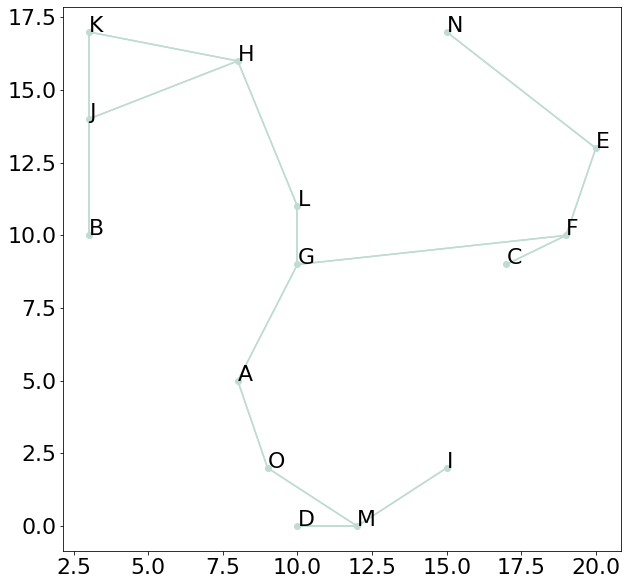

In [11]:
# Make Map of cities to traverse
import matplotlib
import random
import math
import matplotlib.pyplot as plt

def plot_paths(city_map):
    # for each city in the map, get its paths and return those points to plot the lines
    for c in city_map:
        for v in (city_map[c]):
            x_vals=[c[0],v[0]]
            y_vals=[c[1],v[1]]
            plt.plot(x_vals,y_vals,color="#bfdbd4")
city_map = {
    (8, 5): {(10, 9): 4.47, (9, 2): 3.16},
    (3, 10): {(3, 14): 4.0},
    (17, 9): {(19, 10): 2.24},
    (10, 0): {(12, 0): 2.0},
    (20, 13): {(19, 10): 3.16, (15, 17): 6.4},
    (19, 10): {(17, 9): 2.24, (20, 13): 3.16, (10, 9): 9.06},
    (10, 9): {(8, 5): 4.47, (19, 10): 9.06, (10, 11): 2.0}, 
    (8, 16): {(3, 14): 5.39, (3, 17): 5.1, (10, 11): 5.39},
    (15, 2): {(12, 0): 3.61},
    (3, 14): {(3, 10): 4.0, (8, 16): 5.39, (3, 17): 3.0},
    (3, 17): {(8, 16): 5.1, (3, 14): 3.0},
    (10, 11): {(10, 9): 2.0, (8, 16): 5.39},
    (12, 0): {(10, 0): 2.0, (15, 2): 3.61, (9, 2): 3.61}, 
    (15, 17): {(20, 13): 6.4},
    (9, 2): {(8, 5): 3.16, (12, 0): 3.61},
    
}
city_map_label_dict = {
    'A': (8, 5), 'B': (3, 10), 'C': (17, 9), 'D': (10, 0), 'E': (20, 13), 
    'F': (19, 10), 'G': (10, 9), 'H': (8, 16), 'I': (15, 2), 'J': (3, 14), 
    'K': (3, 17), 'L': (10, 11), 'M': (12, 0), 'N': (15, 17), 'O': (9, 2),
}
city_map_label_dict.update({v: k for k, v in city_map_label_dict.items()}) # add reverse (coordinate lookup) to dictionary

city_labels = [
    'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O',
              ]

# plot the map
font = {
        'weight' : 'normal',
        'size'   : 22}

matplotlib.rc('font', **font)
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
plt.scatter([c[0] for c in [c1 for c1 in city_map]],[c[1] for c in [c1 for c1 in city_map]],color="#bfdbd4")
plot_paths(city_map)
for i in range(len(city_map)):    
    ax.annotate('%s' % city_labels[i], 
                xy=city_map_label_dict[city_labels[i]],
                xytext=city_map_label_dict[city_labels[i]],
                xycoords='data',textcoords=('data'))
# for xy in zip([c[0] for c in [c1 for c1 in city_map]], [c[1] for c in [c1 for c1 in city_map]]):                                       
#     ax.annotate('(%s, %s)' % xy, xy=xy, textcoords='data') 

plt.show()



### Perform search to traverse a path with modified And-Or-Graph-Search


Path plan from  I (15, 2) to J (3, 14) :
['M', 'O', 'A', 'G', 'L', 'H', 'J']


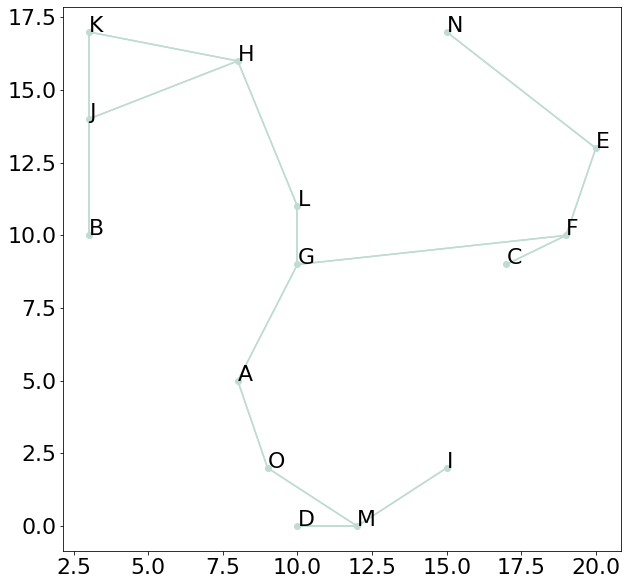

Failures:
M - ['D', 'M', 'I']
I - ['M', 'I']
A - ['G', 'A', 'O', 'M', 'I']
F - ['C', 'F', 'G', 'A', 'O', 'M', 'I']
E - ['N', 'E', 'F', 'G', 'A', 'O', 'M', 'I']
G - ['F', 'G', 'A', 'O', 'M', 'I']
Successes:
H - J
L - H
G - L
A - G
O - A
M - O
I - M


In [12]:
# Question 5
def and_or_graph_search(problem):
    '''method for searching and-or graphs
    returns a conditional plan or failure
    the conditional plan is returned as a list of lists
    ''' 
    path = []
    plan = or_search(problem.get_initial_state(), problem, path)
    return [plan]
    
def or_search(state, problem, path):
    '''returns a plan as a list'''
    if problem.goal_test(state):
        return []
    if state in list(problem.get_labels().keys()):
        # state was in a previous solution so return that solution immediately
        return labels[state]
    if state in list(problem.get_failures().keys()): 
        # state failed previously for a subset of the path
        return None
    if state in path:
        # Record this path as a failure
        problem.add_failure(state, path)
        return None 
    for action in problem.get_actions(state):
        plan = and_search({problem.result(state, action)}, problem, [state]+path)
        if plan != None:
            # record success
            problem.add_labels(state,[action]+[plan])
            return [action]+[plan]
                          
def and_search(states, problem, path):
    '''returns a conditional plan in the form of a list of lists'''
    plan = []
    for s in states:
        p=or_search(s, problem, path)
        plan.append(p)
        if p == None: 
            return None 
    return plan


class GraphProblem:
    '''Class representing problems to be solved by and_or_graph_search'''
    
    def __init__(self, initial_state, goal, graph):
        self.initial_state = initial_state
        self.goal = goal
        self.graph = graph
        self.visited_states = []
        self.labels = {} # holds successful paths 
        self.failures = {} # holds failed paths
        
    def get_failures(self):
        return self.failures
    
    def add_failure(self, state, path):
        ''' record failed search '''
        self.failures[state]=path
        
    def get_labels(self):
        return self.labels
    
    def add_labels(self,state,action_path):
        ''' record successful search'''
        self.labels[state] = action_path
    
    def add_visited_state(self, state):
        self.visited_states.append(state)
        
    def get_initial_state(self):
        return self.initial_state
    
    def get_actions(self, state):
        '''The only actions for a graph node are going to its neighbors'''
        return self.graph.get(state).keys()
    
    def result(self, state, action):
        ''' the result of an action going to a neighbor is its neighbor '''
        return action
    
    def path_cost(self, sum_cost, A, action, B):
        return sum_cost+self.graph.get(A,B)
    
    def goal_test(self, state):
        return state == goal

class State:
    '''Represents states, which have actions'''
    def __init__(self,actions):
        self.actions = actions
    
    def get_actions(self):
        return self.actions


def flatten(plan,pts): 
    if plan == [[]]:
        return pts
    plan = plan.pop(0)
    p = plan.pop()
    pts+=plan
    return flatten(p,pts)


    
initial_city = "I"
goal_city = "J"

initial = city_map_label_dict[initial_city]
goal = city_map_label_dict[goal_city]
map_of_cities = GraphProblem(initial,goal,city_map)
plan = and_or_graph_search(map_of_cities)

print("Path plan from ",initial_city,initial,"to",goal_city,goal,":")
print([city_map_label_dict[p] for p  in flatten(plan,[])]) 

# plot the map
font = {'weight' : 'normal','size'   : 22}
matplotlib.rc('font', **font)
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
plt.scatter([c[0] for c in [c1 for c1 in city_map]],[c[1] for c in [c1 for c1 in city_map]],color="#bfdbd4")
plot_paths(city_map)
for i in range(len(city_map)):    
    ax.annotate('%s' % city_labels[i], xy=city_map_label_dict[city_labels[i]],xytext=city_map_label_dict[city_labels[i]],xycoords='data',textcoords=('data'))
plt.show()

print("Failures:")
for f in map_of_cities.get_failures():
    print(city_map_label_dict[f],"-",[city_map_label_dict[x] for x in map_of_cities.get_failures()[f]])
print("Successes:")
for s in map_of_cities.get_labels():
    for i in range(len(map_of_cities.get_labels()[s])):
        if i % 2 ==0:
            print(city_map_label_dict[s],"-",city_map_label_dict[map_of_cities.get_labels()[s][0]])


# See Write-up Document for Explainations

